<a href="https://colab.research.google.com/github/github123-alt/AnK_Internship/blob/main/Day_4_at_AnK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [7]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 124s 327ms/step - accuracy: 0.0983 - loss: 2.6232 - val_accuracy: 0.0995 - val_loss: 2.5528
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 140s 322ms/step - accuracy: 0.0983 - loss: 2.5504 - val_accuracy: 0.0995 - val_loss: 2.4855
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 141s 320ms/step - accuracy: 0.1006 - loss: 2.4798 - val_accuracy: 0.0995 - val_loss: 2.4228
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 123s 327ms/step - accuracy: 0.1021 - loss: 2.4198 - val_accuracy: 0.1008 - val_loss: 2.3654
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 124s 331ms/step - accuracy: 0.1178 - loss: 2.3632 - val_accuracy: 0.1483 - val_loss: 2.3143
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 140s 326ms/step - accuracy: 0.1684 - loss: 2.3122 - val_accuracy: 0.2514 - val_loss: 2.2694
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 120s 320ms/step - accuracy: 0.2319 - loss: 2.2691 - val_accuracy: 0.3648 - val_loss: 2.2295
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 122s 324ms/step - accuracy: 0.3086 -

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 2.1166768074035645
accuracy= 0.5508999824523926


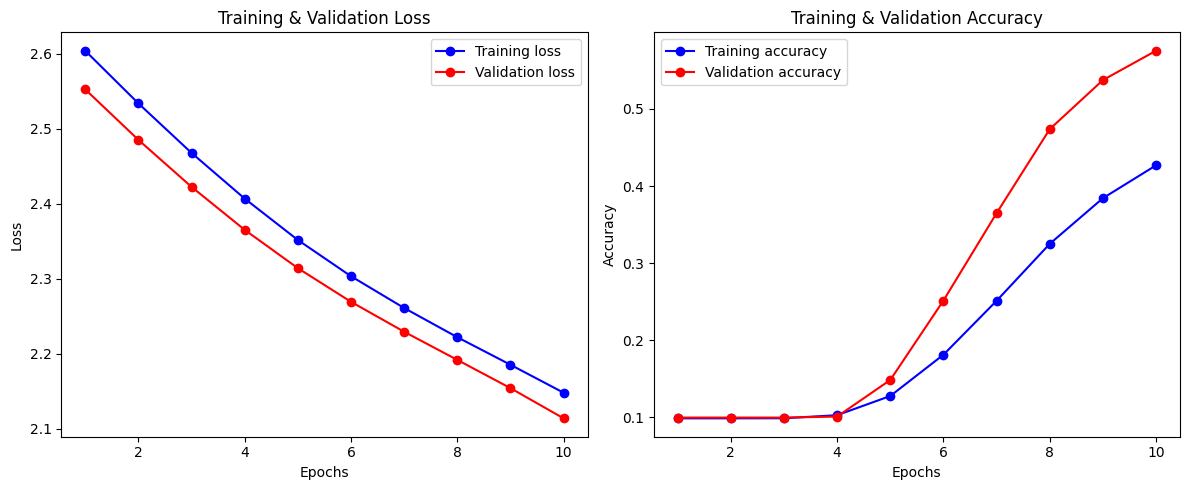

In [14]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


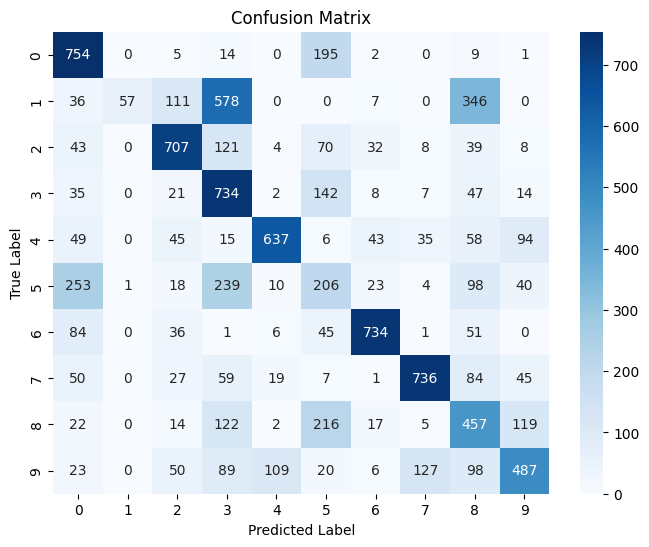

              precision    recall  f1-score   support

           0       0.56      0.77      0.65       980
           1       0.98      0.05      0.10      1135
           2       0.68      0.69      0.68      1032
           3       0.37      0.73      0.49      1010
           4       0.81      0.65      0.72       982
           5       0.23      0.23      0.23       892
           6       0.84      0.77      0.80       958
           7       0.80      0.72      0.75      1028
           8       0.36      0.47      0.40       974
           9       0.60      0.48      0.54      1009

    accuracy                           0.55     10000
   macro avg       0.62      0.55      0.54     10000
weighted avg       0.63      0.55      0.53     10000



In [15]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_true, y_pred))

# **Explained:**

•	Essential libraries for building and training neural networks were imported .

•	Confusion matrix and classification report are imported which correspondingly show number of correct and incorrect predictions and provide summary of model’s performance.

•	Keras is a high level API for building and training deep learning models.

•	MNIST database is imported from keras

•	Model is imported to configure, train and evaluate neural network

•	Dense layer is fully connected layer where every neuron receives input from all neurons from previous layer

•	Input layer defines the shape of the data that the model is expected to receive.

•	Conv2D performs 2D convolutions like image data processing

•	Maxpooling2D reduces the spatial dimensions of feature map

•	Dropout prevents overfitting

•	Flatten to flatten the output of convolutional layers into 1D

•	Backend provides low level operations for working with tensors.

•	Then data is loaded from mnist. X_train contains array of images and y_train contains array of labels

•	Dimension for images is set at 28x28

•	Image data format is checked and train/test were reshaped to include channel dimension

•	The image data was converted from integers to floating values and pixel values were normalized by dividing with 255 to help neural network converge faster.

•	Then, integer labels of mnist dataset was converted to one hot encoded format. It is needed to train the model with categorical cross entropy loss function.

•	Inpx defined the input layer of the model. The first convolutional layer was defined with 32 filters/kernels, 3x3 pixels and Rectified Linear Unit was used as activation function. Layer 3 is the max pooling layer which takes maximum value within each pool window of 3x3. Layer 4 applies dropout regularization with 50% of neurons is layer 3’s output set to zero. Layer 5 reshapes the previous layer to 1D vector. Layer 6 is the first fully connected layer which specifies 250 neurons

•	Training progress for each epoch is outputted including loss and accuracy

•	The trained model evaluates on the test dataset to access its performance on unseen data.

•	The training and validating loss and accuracy was visualized for each epochs.

•	Finally, the trained model’s performance on each dataset was evaluated and the results were visualized using confusion matrix.
